<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Plotting-and-visualization" data-toc-modified-id="Plotting-and-visualization-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Plotting and visualization</a></span><ul class="toc-item"><li><span><a href="#A-brief-matplotlib-API-primer" data-toc-modified-id="A-brief-matplotlib-API-primer-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>A brief matplotlib API primer</a></span><ul class="toc-item"><li><span><a href="#Figures-and-subplots" data-toc-modified-id="Figures-and-subplots-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Figures and subplots</a></span></li><li><span><a href="#Colors,-markers,-linestyles" data-toc-modified-id="Colors,-markers,-linestyles-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Colors, markers, linestyles</a></span></li><li><span><a href="#Ticks,-labels,-legends" data-toc-modified-id="Ticks,-labels,-legends-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Ticks, labels, legends</a></span></li><li><span><a href="#Annotations,-drawing" data-toc-modified-id="Annotations,-drawing-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Annotations, drawing</a></span></li><li><span><a href="#Saving-plots-to-file" data-toc-modified-id="Saving-plots-to-file-1.1.5"><span class="toc-item-num">1.1.5&nbsp;&nbsp;</span>Saving plots to file</a></span></li><li><span><a href="#matplotlib-config" data-toc-modified-id="matplotlib-config-1.1.6"><span class="toc-item-num">1.1.6&nbsp;&nbsp;</span>matplotlib config</a></span></li></ul></li><li><span><a href="#Plotting-with-pandas-and-seaborn" data-toc-modified-id="Plotting-with-pandas-and-seaborn-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plotting with pandas and seaborn</a></span><ul class="toc-item"><li><span><a href="#Series" data-toc-modified-id="Series-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Series</a></span></li><li><span><a href="#Data-frame" data-toc-modified-id="Data-frame-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Data frame</a></span></li><li><span><a href="#Bar-plots" data-toc-modified-id="Bar-plots-1.2.3"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Bar plots</a></span></li><li><span><a href="#Scatter-plots" data-toc-modified-id="Scatter-plots-1.2.4"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Scatter plots</a></span></li><li><span><a href="#Facet-grids." data-toc-modified-id="Facet-grids.-1.2.5"><span class="toc-item-num">1.2.5&nbsp;&nbsp;</span>Facet grids.</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import datetime
import pprint 

import pandas as pd
#import pandas_datareader.data as web
print(pd.__version__)
import numpy as np
from numpy import nan as NA

import matplotlib.pyplot as plt

0.25.0


# Plotting and visualization

## A brief matplotlib API primer

In [2]:
data = np.arange(10)

data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

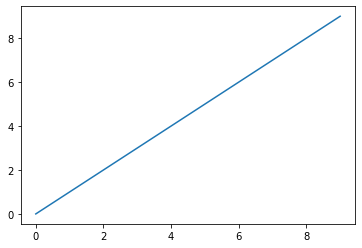

In [3]:
plt.plot(data)

### Figures and subplots

Figure(432x288)


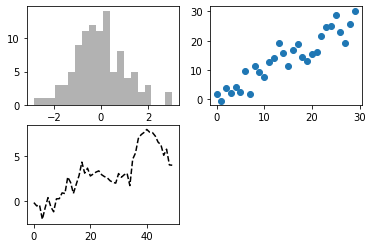

In [4]:
# Plots in matplotlib reside within a Figure object.

fig = plt.figure()
print(fig)

# To plot on a blank figure you need to create subplots.
# E.g., create 4 subplots, arranged in a 2x2 grid, selecting the
# first one.
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

# Notes that plots are reset after each cell is evaluated so
# you might need to put more plotting commands in a single cell.

# Plot a random walk on last subplot, which is pointed by plt.
plt.plot(np.random.randn(50).cumsum(), 'k--')
#ax3.plot(np.random.randn(50).cumsum(), 'k--')

# Plot an histogram on the first subplot.
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

# Plot scatterplot on second subplot.
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

[[<matplotlib.axes._subplots.AxesSubplot object at 0x112ad9b00>


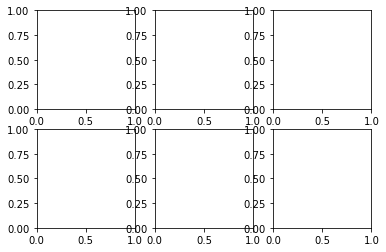

In [5]:
# Create a figure with a 2x3 grid of subplots.
fig, axes = plt.subplots(2, 3)

print(axes)

# With sharex/y one can have the same axes.

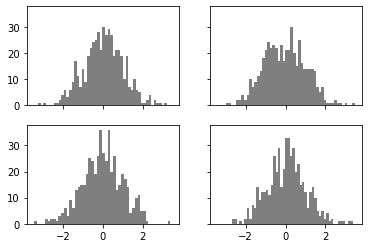

In [6]:
def _plot():
    # Create a figure with a grid of subplots (sharing axes).
    fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
    for i in range(2):
        for j in range(2):
            axes[i, j].hist(
                np.random.randn(500), bins=50, color='k', alpha=0.5)


_plot()

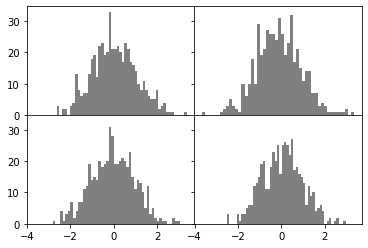

In [7]:
# Control the spacing around the plots.
_plot()
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, linestyles

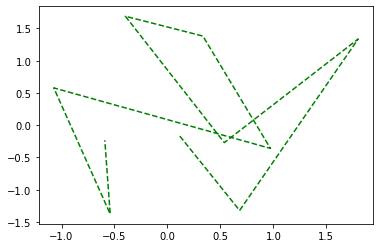

In [8]:
fig, ax = plt.subplots()

# Random points.
x = np.random.randn(10)
y = np.random.randn(10)
ax.plot(x, y, 'g--')

# This is a shortcut for:
#   ax.plot(x, y, linestyle='--', color='g')

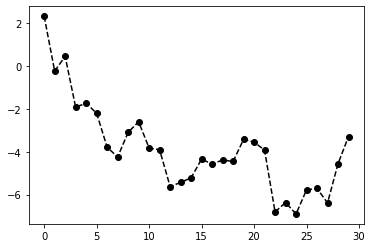

In [9]:
# One can specify color, markers, and linestyle.

data = np.random.randn(30).cumsum()
plt.plot(data, 'ko--')
# plt.plot( ... , color='k', linestyle='dashed', market='o')

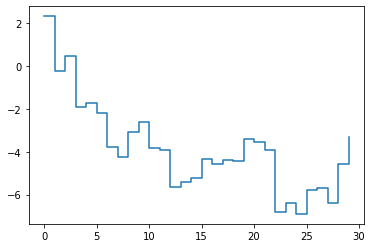

In [10]:
# To plot without interpolation.
plt.plot(data, drawstyle='steps-post')

### Ticks, labels, legends

- One can
    - use procedural pyplot interface
    - use OO interface
    
- pyplot have methods like xlim, xticks, xticklabels acting on the last axes
    - plt.xlim()
    - plt.xlim([0, 10])
   
- This corresponds to methods on the object
    - ax.get_xlim()
    - ax.set_xlim()

In [11]:
def _plot():
    np.random.seed(1000)
    # Create figure.
    fig = plt.figure()
    # Create a subplot.
    ax = fig.add_subplot(1, 1, 1)
    # Plot random walk.
    ax.plot(np.random.randn(1000).cumsum())
    return ax

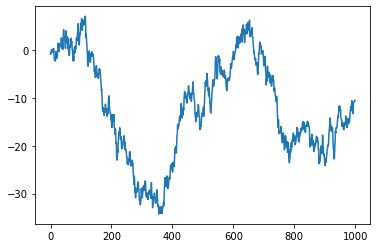

In [12]:
_plot()

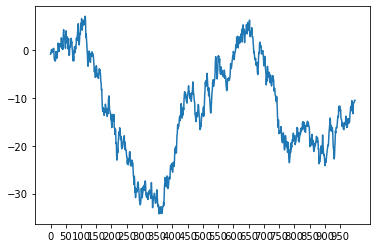

In [13]:
ax = _plot()

# Specify which x-ticks to use.
#_ = ax.set_xticks([0, 250, 500, 750, 1000])
_ = ax.set_xticks(range(0, 1000, 50))

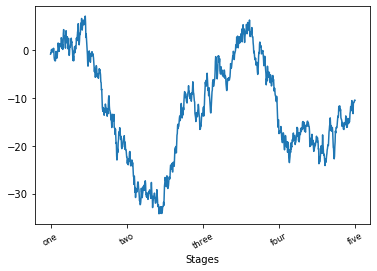

In [14]:
ax = _plot()

# Specify x-ticks and its labels.
_ = ax.set_xticks([0, 250, 500, 750, 1000])
_ = ax.set_xticklabels('one two three four five'.split(),
                       rotation=30, fontsize='small')
# Give a name to the x-axis.
ax.set_xlabel('Stages');

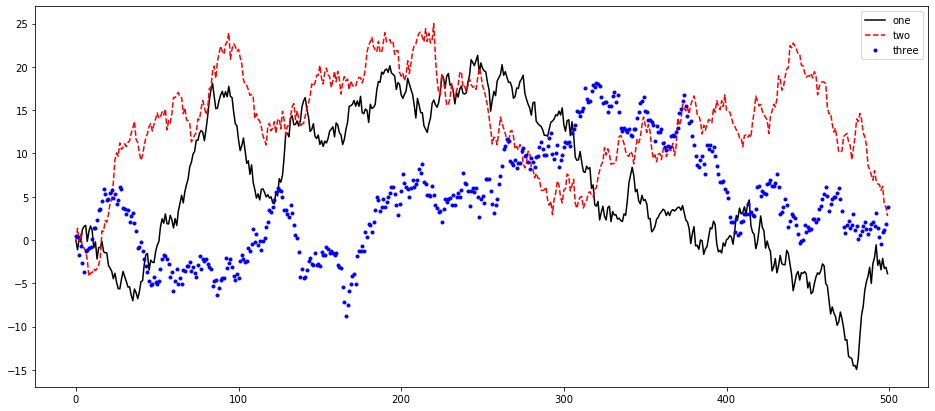

In [15]:
# Create a figure and a single plot.
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1)

# Plot multiple random walks, with different style / color / marker.
ax.plot(np.random.randn(500).cumsum(), 'k', label='one')
ax.plot(np.random.randn(500).cumsum(), 'r--', label='two')
ax.plot(np.random.randn(500).cumsum(), 'b.', label='three')

ax.legend(loc='best')

### Annotations, drawing

(600, 1800)

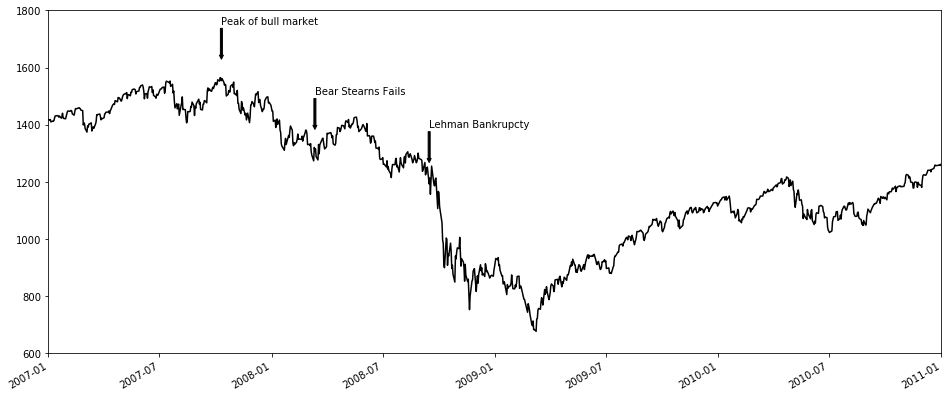

In [16]:
data = pd.read_csv(
    "~/src/pydata-book/examples/spx.csv", index_col=0, parse_dates=True)

# Plot curve.
fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 1, 1)

spx = data['SPX']
spx.plot(ax=ax, style='k-')

# Plot arrows.
crisis_data = [(datetime.datetime(2007, 10, 11), "Peak of bull market"),
               (datetime.datetime(2008, 3, 12), "Bear Stearns Fails"),
               (datetime.datetime(2008, 9, 15), "Lehman Bankrupcty")]

for date, label in crisis_data:
    ax.annotate(
        label,
        xy=(date, spx.asof(date) + 75),
        xytext=(date, spx.asof(date) + 225),
        arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
        horizontalalignment='left',
        verticalalignment='top')

# Zoom in 2007-2008.
ax.set_xlim(['2007-01-01', '2011-01-01'])
ax.set_ylim([600, 1800])

### Saving plots to file

In [17]:
# Save the active figure.
# - trim whitespace around actual figure 
if False:
    plt.savefig('', dpi=400, bbox_inches='tight')

### matplotlib config

In [18]:
# One can modify the config from Python.
if False:
    plt.rc('figure', figsize=(10, 10))

# First arg is:
# - figure
# - axes
# - xtick
# - ytick
# - grid
# - legend
# ...

if False:
    font_options = {'family': 'monospace',
                    'weight': 'bold',
                    'size': 'small'}
    plt.rc('font', **font_options)

## Plotting with pandas and seaborn

- In matplotlib you assemble a plot from its base components (fairly
  low level)
    - type of plot
    - legend
    - title
    - tick labels
    ...
    
- pandas allows to plot from DataFrames and Series

- seaborn simplifies many common visualization plots

### Series

0    -0.804458
10   -0.483527
20   -0.509010
30    0.135314
40   -0.165482
50    0.223992
60    0.116555
70   -0.363428
80    0.231607
90   -0.233060
dtype: float64


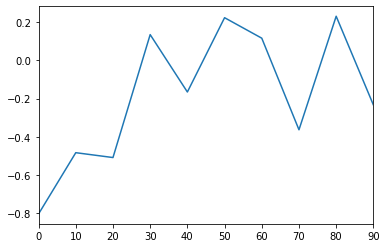

In [19]:
np.random.seed(1000)

s = pd.Series(np.random.randn(10).cumsum(),
              index=np.arange(0, 100, 10))
print(s)

# Plot using continuous series.
s.plot()

In [20]:
# Options for pd.Series.plot():
# - label: label for plot legend
# - style: "ko--"
# - alpha
# - kind: area, bar, barh, density, hist, kde
# - rot: rotate labels
# - xticks: values to use for x-axis
# - xlim, ylim
# - grid

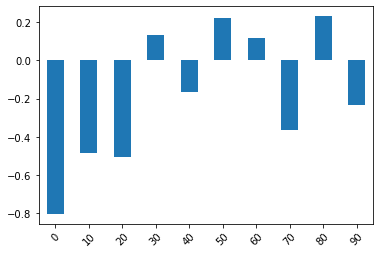

In [21]:
# Plot the data as a barplot using 45* rotated labels.
s.plot(kind="bar", rot=45)

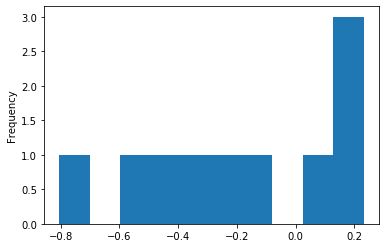

In [22]:
s.plot(kind="hist")

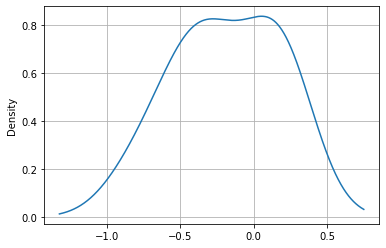

In [23]:
# Estimate density.
s.plot(kind="density", grid=True)
#s.plot(kind="kde")

In [24]:
# 1) Most pandas plotting method accept an "ax" param, which can be a matplotlib subplot
# object.
# - This allows to place figures in a grid layout.
# 2) There is a subplot=True argument to plot series in different plots.

# Additional kwargs (keyword arguments) are passed to the underlying matplotlib functions.

### Data frame

- Options
    - subplots: plot each column in a separate subplot

,A,B,C,D
0,-0.804458,0.320932,-0.025483,0.644324
10,-1.105255,0.710406,-0.132920,0.164341
20,-0.510219,0.245739,0.534361,-0.641775
30,-1.706289,-0.160222,0.351984,-0.538582
40,-1.844711,0.545471,1.623779,-1.525329
50,-2.179547,0.445989,2.030971,-0.605942
60,-1.867429,1.979150,1.480797,-0.989089
70,-2.690370,3.579234,1.411516,-0.905880
80,-3.017294,3.533436,1.107056,1.017130
90,-3.095953,2.951371,-0.510926,1.884391


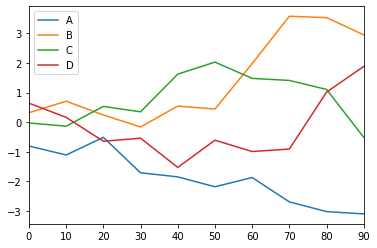

In [25]:
np.random.seed(1000)

# Create 4 random walks.
df = pd.DataFrame(
    np.random.randn(10, 4).cumsum(axis=0),
    columns=['A', 'B', 'C', 'D'],
    index=np.arange(0, 100, 10))

display(df)
df.plot()
#df.plot.line()

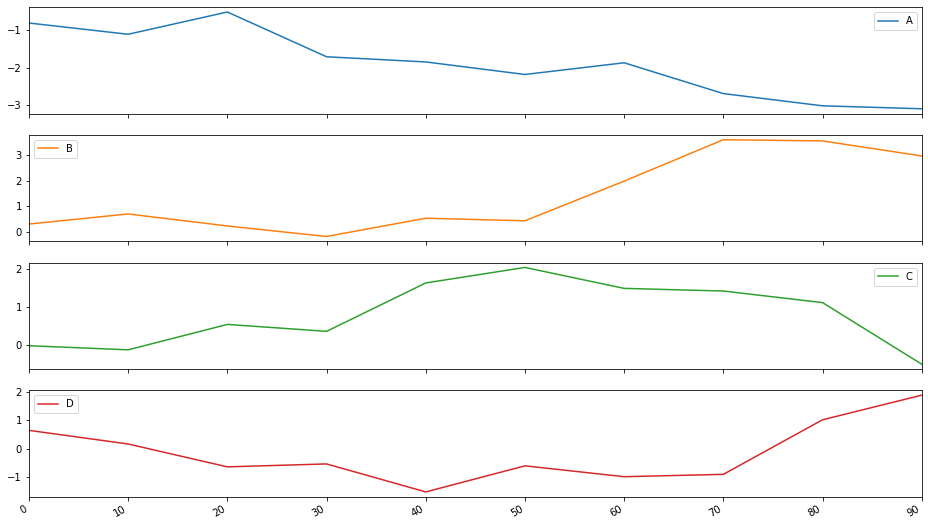

In [26]:
# Plot each figure on a different subplot.
df.plot(figsize=(16, 10), subplots=True);

### Bar plots

a    0.543405
b    0.278369
c    0.424518
d    0.844776
e    0.004719
f    0.121569
g    0.670749
h    0.825853
i    0.136707
j    0.575093
k    0.891322
l    0.209202
m    0.185328
n    0.108377
o    0.219697
p    0.978624
dtype: float64

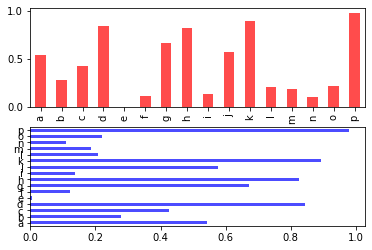

In [27]:
np.random.seed(100)

fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
display(data)

# Plot in different subplots using the ax argument.
data.plot.bar(ax=axes[0], color='r', alpha=0.7)
data.plot.barh(ax=axes[1], color='b', alpha=0.7)

In [28]:
# Plotting a DataFrame as a barplot means plotting multiple bars for each row.
df = pd.DataFrame(
    np.random.rand(6, 4),
    index=['one', 'two', 'three', 'four', 'five', 'six'],
    columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df

Genus,A,B,C,D
one,0.811683,0.171941,0.816225,0.274074
two,0.431704,0.940030,0.817649,0.336112
three,0.175410,0.372832,0.005689,0.252426
four,0.795663,0.015255,0.598843,0.603805
five,0.105148,0.381943,0.036476,0.890412
six,0.980921,0.059942,0.890546,0.576901


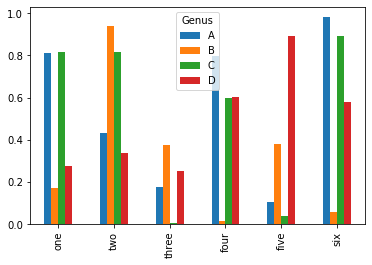

In [29]:
# Plot df using different groups.
df.plot(kind="bar")

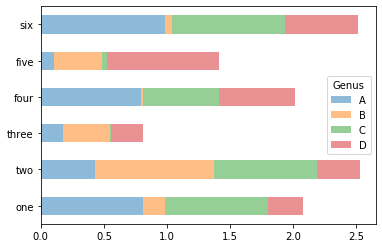

In [30]:
df.plot.barh(stacked=True, alpha=0.5)

In [31]:
tips = pd.read_csv('~/src/pydata-book/examples/tips.csv')

tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [32]:
# Cross-tabulate by day and party size.
party_counts = pd.crosstab(tips['day'], tips['size'])

display(party_counts)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [33]:
print(party_counts.sum(axis=1))

day
Fri     19
Sat     87
Sun     76
Thur    62
dtype: int64


In [34]:
print(party_counts.sum(axis=1).sum())
print(len(tips))

244
244


In [35]:
# Divide the table by the columns.
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

party_pcts

size,1,2,3,4,5,6
day,,,,,,
Fri,0.052632,0.842105,0.052632,0.052632,0.000000,0.000000
Sat,0.022989,0.609195,0.206897,0.149425,0.011494,0.000000
Sun,0.000000,0.513158,0.197368,0.236842,0.039474,0.013158
Thur,0.016129,0.774194,0.064516,0.080645,0.016129,0.048387


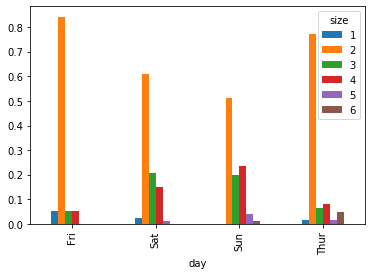

In [36]:
party_pcts.plot.bar()

In [37]:
tips[['tip', 'total_bill']].head()

,tip,total_bill
0,1.01,16.99
1,1.66,10.34
2,3.50,21.01
3,3.31,23.68
4,3.61,24.59


In [38]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

tips[['tip', 'total_bill', 'tip_pct']].head()

,tip,total_bill,tip_pct
0,1.01,16.99,0.063204
1,1.66,10.34,0.191244
2,3.50,21.01,0.199886
3,3.31,23.68,0.162494
4,3.61,24.59,0.172069


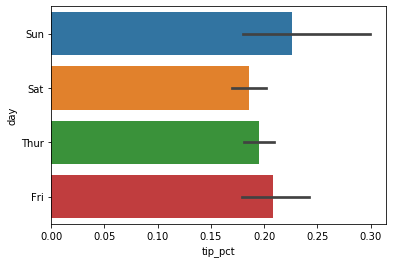

In [39]:
import seaborn as sns

# seaborn
#plotting functions take a data argument as a pd.DataFrame

# 95% conf intervals are reported.
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [40]:
# One can plot data using categorical variable.

In [41]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


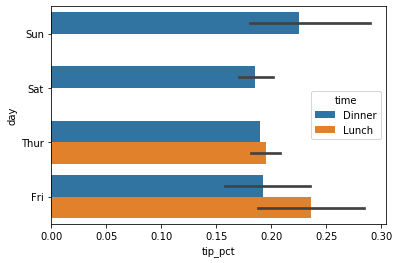

In [42]:
sns.barplot(x='tip_pct', y='day',
            # Use time to group data.
            hue='time',
            #
            data=tips, orient='h')

In [43]:
# One can change the aesthetics of plots.
sns.set(style="whitegrid")
sns.set()

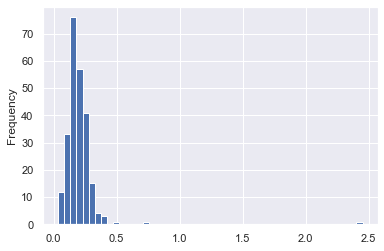

In [44]:
tips['tip_pct'].plot.hist(bins=50)

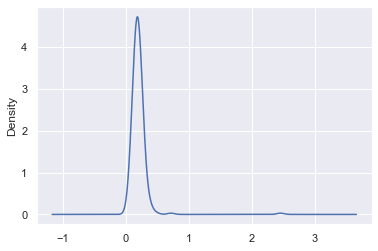

In [45]:
# Approximate the discrete histogram with sum of kernels.
tips['tip_pct'].plot.density()

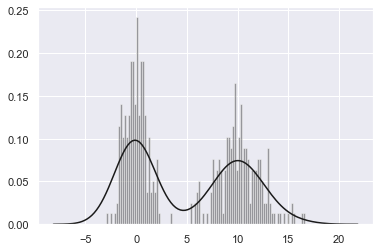

In [46]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### Scatter plots

In [47]:
macro = pd.read_csv(
    "~/src/pydata-book/examples/macrodata.csv")

macro.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [48]:
data = macro["cpi m1 tbilrate unemp".split()]

trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 vs log unemp')

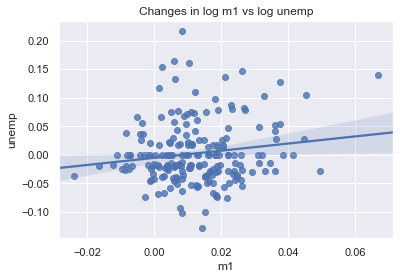

In [49]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title("Changes in log %s vs log %s" % ("m1", "unemp"))

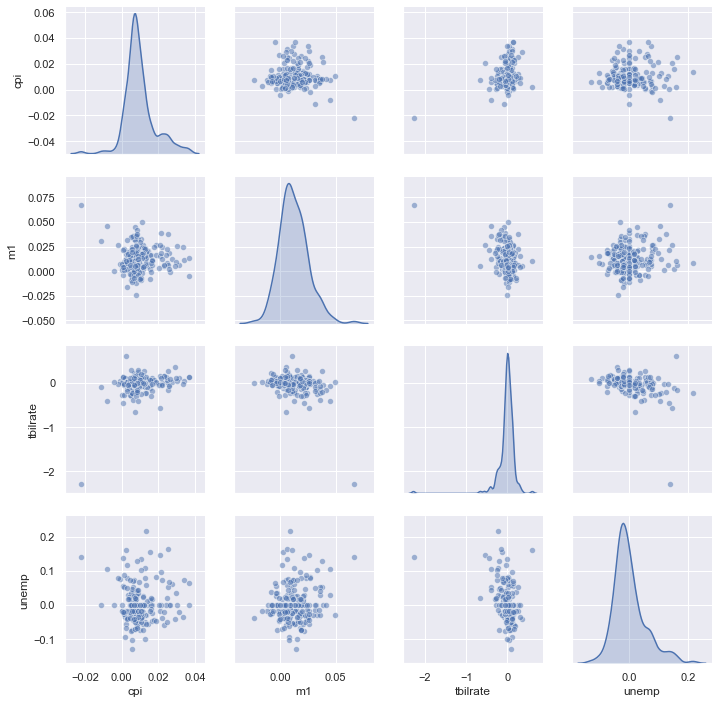

In [50]:
# It is useful to look at the scatter plots among a group of variables:
# - pairs plot
# - scatter plot matrix

# We use plot_kws (keywords) to pass down options.
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.5})

### Facet grids.

- We can visualize plots by grouping by different values of a categorical
  variable

/Users/saggese/.conda/envs/study/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


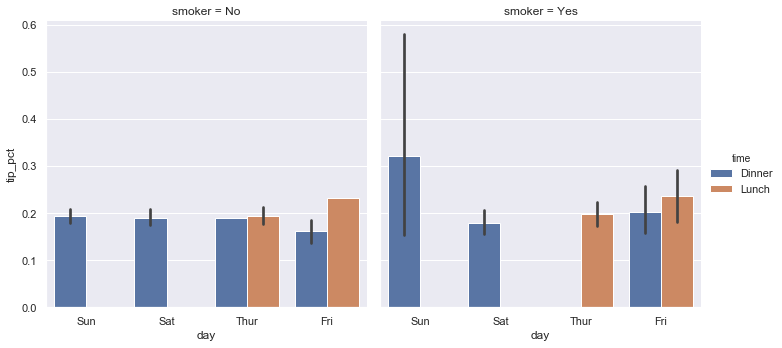

In [51]:
# Use "hue" and "col" to control the graph.
sns.factorplot(
    x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips)

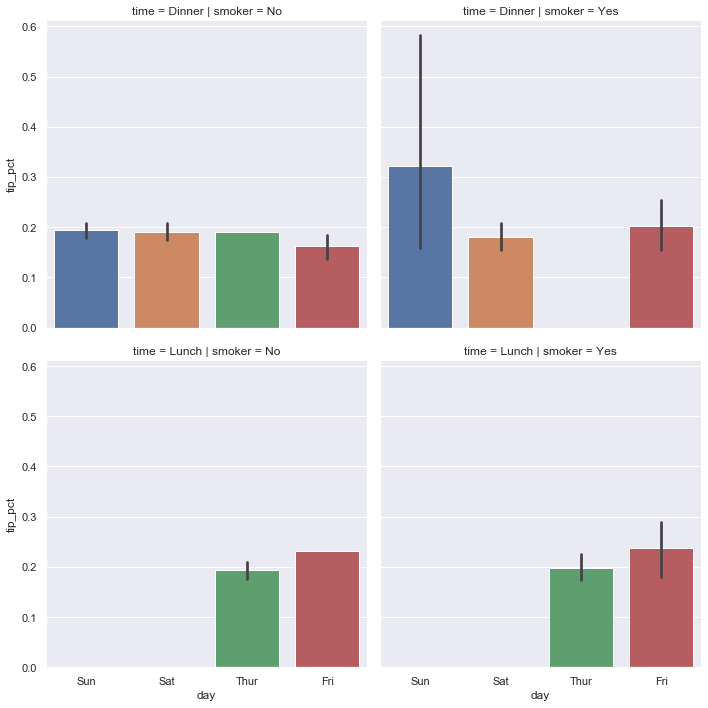

In [52]:
# Use "row" and "col" to control the graph.
sns.factorplot(
    x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips)

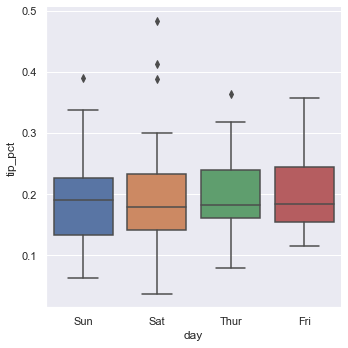

In [53]:
# One can also use different types of plots, e.g., box plots,
# instead of bar plots.

sns.factorplot(x='day', y='tip_pct', kind='box', data=tips[tips.tip_pct < 0.5])